# SC2001 ALGORITHM DESIGN AND ANALYSIS

## Project 1: Integration of Mergesort & Insertion Sort

The main aim of this project is to develop a hybrid algorithm that implements the best qualities of merge sort and insertion sort and is more efficient.

## (a) Algorithm Implementation: Implement the Hybrid Algorithm

In Mergesort, when the sizes of subarrays are small, the overhead of many recursive
calls makes the algorithm inefficient. 
The idea is to set a small integer S as a threshold for the size of subarrays.
Once the size of a subarray in a recursive call of Mergesort is less than or equal to S,
the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

In [4]:
# First, importing the required libraries for this project 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit
import copy

### Key Comparison Class

In [5]:
class Comparisons:
    def __init__(self):
        self.num_comparisons = 0

    def greater_than(self, a, b) -> bool:
        self.num_comparisons += 1
        return a > b

    def less_than(self, a, b) -> bool:
        self.num_comparisons += 1
        return a < b

    def equal_to(self, a, b) -> bool:
        self.num_comparisons += 1
        return a == b

    def increment(self, count):
        self.num_comparisons += count

    def reset(self):
        self.num_comparisons = 0

    def get_count(self):
        return self.num_comparisons


# Fixed threshold value
def THRESHOLD_VAL():
    return 10


### Insertion Sort Algorithm

In [6]:
def insertion_sort(list, comparisons):
    
    for i in range(1, len(list)):
        key = list[i] 
        j = i-1 

        while j >= 0 and comparisons.less_than(key, list[j]): 
            list[j+1] = list[j]
            j -= 1
        
        list[j+1] = key 

    return list

### Merge Sort Algorithm

In [7]:
def merge(arr1, arr2, comparisons):
    #initialise indices for each array
    i=0
    j=0

    #initialise the final sorted and merged array
    merged_arr = []

    #compare the elements from each array and merge them in sorted order into the merged_arr
    while i < len(arr1) and j < len(arr2):
        #if element of 1st array is smaller than element of 2nd array, place element of 1st array into the end of merged_arr
        if comparisons.less_than(arr1[i], arr2[j]):
            merged_arr.append(arr1[i])
            i+=1
        #else if element of 2nd array is smaller than element of 1st array, place element of 2nd array into the end of merged_arr
        elif arr2[j] < arr1[i]:
            merged_arr.append(arr2[j])
            j+=1
        #else if the elements of both arrays are equal, move both elements to the end of merged_arr
        else:
            merged_arr.append(arr1[i])
            merged_arr.append(arr2[j])
            i+=1
            j+=1
    
    #if 1st array still has elements, move all the elements in 1st array to the end of merged_arr
    while i < len(arr1):
        merged_arr.append(arr1[i])
        i+=1

    #if 2nd array still has elements, move all the elements in 2nd array to the end of merged_arr
    while j < len(arr2):
        merged_arr.append(arr2[j])
        j+=1

    return merged_arr     

In [8]:
def mergeSort(arr, comparisons, threshold):
    if len(arr) <= threshold or len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left = mergeSort(arr[:mid], comparisons, threshold)
    right = mergeSort(arr[mid:], comparisons, threshold)
    
    return merge(left, right, comparisons)


### Hybrid Algorithm

In [9]:
def hybridSort(arr,comparisons, S):
    # Base case. Array has 1 element.
    if len(arr) <= 1:
        return arr
    
    # Merge Sort 
    if len(arr) > S:
        mid = len(arr) // 2

        left = hybridSort(arr[:mid], comparisons, S)
        right = hybridSort(arr[mid:], comparisons, S)
        
        return merge(left, right, comparisons)    

    # Insertion Sort
    else:
        arr = insertion_sort(arr, comparisons)
        return arr

### Sample Testing Data

Creates a random dataset and runs it through the insertionSort, mergeSort and hybridSort algorithms to verify functionality

In [10]:
testCompare = Comparisons()   

#Generate Testing Dataset of 5,000 integers from -10,000 to 10,000
rng = np.random.default_rng()
unsortedArr = rng.integers(-10000,10000,5000)
np.set_printoptions(threshold=100)
print("Sample Test Array: \n",unsortedArr,"\n")

#insertionSort
testingArr = unsortedArr
testCompare.reset
insertion_sort(testingArr, testCompare)
print("Insertion Sort Comparison Count:\n",testCompare.get_count())
print("Insertion Sort Final Array: \n", testingArr,"\n")

#mergeSort
testingArr = unsortedArr
testCompare.reset
mergeSort(testingArr, testCompare, 0)
print("Merge Sort Comparison Count:\n",testCompare.get_count())
print("Merge Sort Final Array: \n", testingArr,"\n")

#hybridSort
testingArr = unsortedArr
testCompare.reset
hybridSort(testingArr, testCompare, 0)
print("Hybrid Sort Comparison Count:\n",testCompare.get_count())
print("Hybrid Sort Final Array: \n", testingArr,"\n")

Sample Test Array: 
 [ 5224 -5133 -8663 ...  4142   975   141] 

Insertion Sort Comparison Count:
 6246834
Insertion Sort Final Array: 
 [-9996 -9996 -9993 ...  9991  9994  9999] 

Merge Sort Comparison Count:
 6276638
Merge Sort Final Array: 
 [-9996 -9996 -9993 ...  9991  9994  9999] 

Hybrid Sort Comparison Count:
 6306442
Hybrid Sort Final Array: 
 [-9996 -9996 -9993 ...  9991  9994  9999] 



## (b) Generate input data

In [11]:
np.random.seed(5)

# Creating a list of dataset sizes
size_list = []

# Setting the starting dataset size to 1000
start_size = 1000 

# Iteratively appending datasizes to the list
for i in range (0,4):
    for j in range (1,11):
        size_list.append(j * start_size)
    start_size = start_size * 10

# Removing the size values that were repeated
datasize = []
for i in size_list:
    if i not in datasize:
        datasize.append(i)

# Printing the list to check for any discrepencies
print (datasize)

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]


In [12]:
# Creating a list for the datasets
datasets = []

# Setting the maximum value of the randomly generated dataset
#max_value = 1000

# Iterating through each size value in the datasize array
for value in datasize:
    
    # Creating a list of integers for each size ranging through 1000, 2000,...,10000000
    data_points = np.random.randint(1, value+1 ,size = value)
    datasets.append(data_points)

# Printing the Datasets to check for discrepencies
for i in range(len(datasets)):
    print("size of array: ", len(datasets[i]))
    print("Minimum value of this array:" , min(datasets[i]))
    print("Maximum of this array:" , max(datasets[i]))
    print()

size of array:  1000
Minimum value of this array: 1
Maximum of this array: 1000

size of array:  2000
Minimum value of this array: 2
Maximum of this array: 1999

size of array:  3000
Minimum value of this array: 3
Maximum of this array: 3000

size of array:  4000
Minimum value of this array: 1
Maximum of this array: 3999

size of array:  5000
Minimum value of this array: 1
Maximum of this array: 4999

size of array:  6000
Minimum value of this array: 1
Maximum of this array: 5997

size of array:  7000
Minimum value of this array: 3
Maximum of this array: 6999

size of array:  8000
Minimum value of this array: 2
Maximum of this array: 8000

size of array:  9000
Minimum value of this array: 3
Maximum of this array: 9000

size of array:  10000
Minimum value of this array: 1
Maximum of this array: 9999

size of array:  20000
Minimum value of this array: 1
Maximum of this array: 19999

size of array:  30000
Minimum value of this array: 1
Maximum of this array: 30000

size of array:  40000
M

In [13]:
# Verifying that the arrays were created correctly
print(datasets[0])

[868 207 702 ... 685  37 814]


## (c) Analyze time complexity

#### (i) Plotting key comparisons over different sizes of the input list (dataset) with the threshold value fixed at 10

Using our hybrid sort algorithm, we first figure out the empirical results by running the different datsets with the fixed threshold at 10:

### Empirical analysis

In [14]:
# Fixing the threshold value to S
thresholdS = THRESHOLD_VAL()
print ("The fixed threshold value S is",thresholdS)
print ()

# making an object to store the key comparisons
keyCompare = Comparisons()

comparisons = [] # stores the key comparisons
sizes = [] # stores the dataset sizes

for data in datasets :
    dataCopy = list (data)
    dataLength = len (dataCopy)
    sizes.append(dataLength) 

    sortedArr = hybridSort(dataCopy, keyCompare, thresholdS)
    comparisons.append (keyCompare.get_count())
    keyCompare.reset()

diffSizes_dict = {
    "Threshold value ": thresholdS,
    "Dataset sizes":sizes,
    "Key Comparisons":comparisons
}

df = pd.DataFrame(diffSizes_dict)
print(df)



The fixed threshold value S is 10

    Threshold value   Dataset sizes  Key Comparisons
0                 10           1000             8742
1                 10           2000            19471
2                 10           3000            30411
3                 10           4000            42943
4                 10           5000            56602
5                 10           6000            66616
6                 10           7000            80076
7                 10           8000            93950
8                 10           9000           108507
9                 10          10000           123286
10                10          20000           266592
11                10          30000           407699
12                10          40000           573066
13                10          50000           709785
14                10          60000           876209
15                10          70000          1048239
16                10          80000          1225590
17         

### Theoretical analysis
The main idea of the hybrid sort is that to sort a list of size "N", we first split the the list into sublists of size "S" which refers to the threshold value.

The significance of the threshold value is that once the sublists are of the threshold value size, we start doing insertion sort. Hence, insertion sort is done on the lists of size "S".

From the lectures, we learnt that the worst and average time complexity of insertion sort is $O(n^2)$ and the best case is $O(n)$ when the size of the array is $n$.

Hence, in this case, since the size of the array is "S" and the number of such sublists is $\frac{N}{S}$, we can conclude that:

- Best case for insertion sort in the hybrid sort: $\frac{N}{S} * O(S)$  = $O(N)$
- Worst & average case for insertion sort in the hybrid sort: $\frac{N}{S} * O(S^2)$  = $O(NS)$

After insertion sort, the sorted arrays are then merged using the merge algorithm. 
The total number of iterations that will take place in this case: $log (\frac{N}{S})$ .
The actual cost of merging is $N$ since there are total $N$ elements. So, for merging: $O(N * log(\frac{N}{S}))$


Therfore, total time complexity of our hybrid sort is hence :

- Best case of hybrid sort: $ O(N + (N * log(\frac{N}{S})))$

- Worst case and Average case of hybrid sort:  $O(NS + (N * log(\frac{N}{S})))$

#### Using the list of key comparisons for different data sizes that we've collected, we can now plot the chart to compare the theoretical and empirical results

<function matplotlib.pyplot.show(close=None, block=None)>

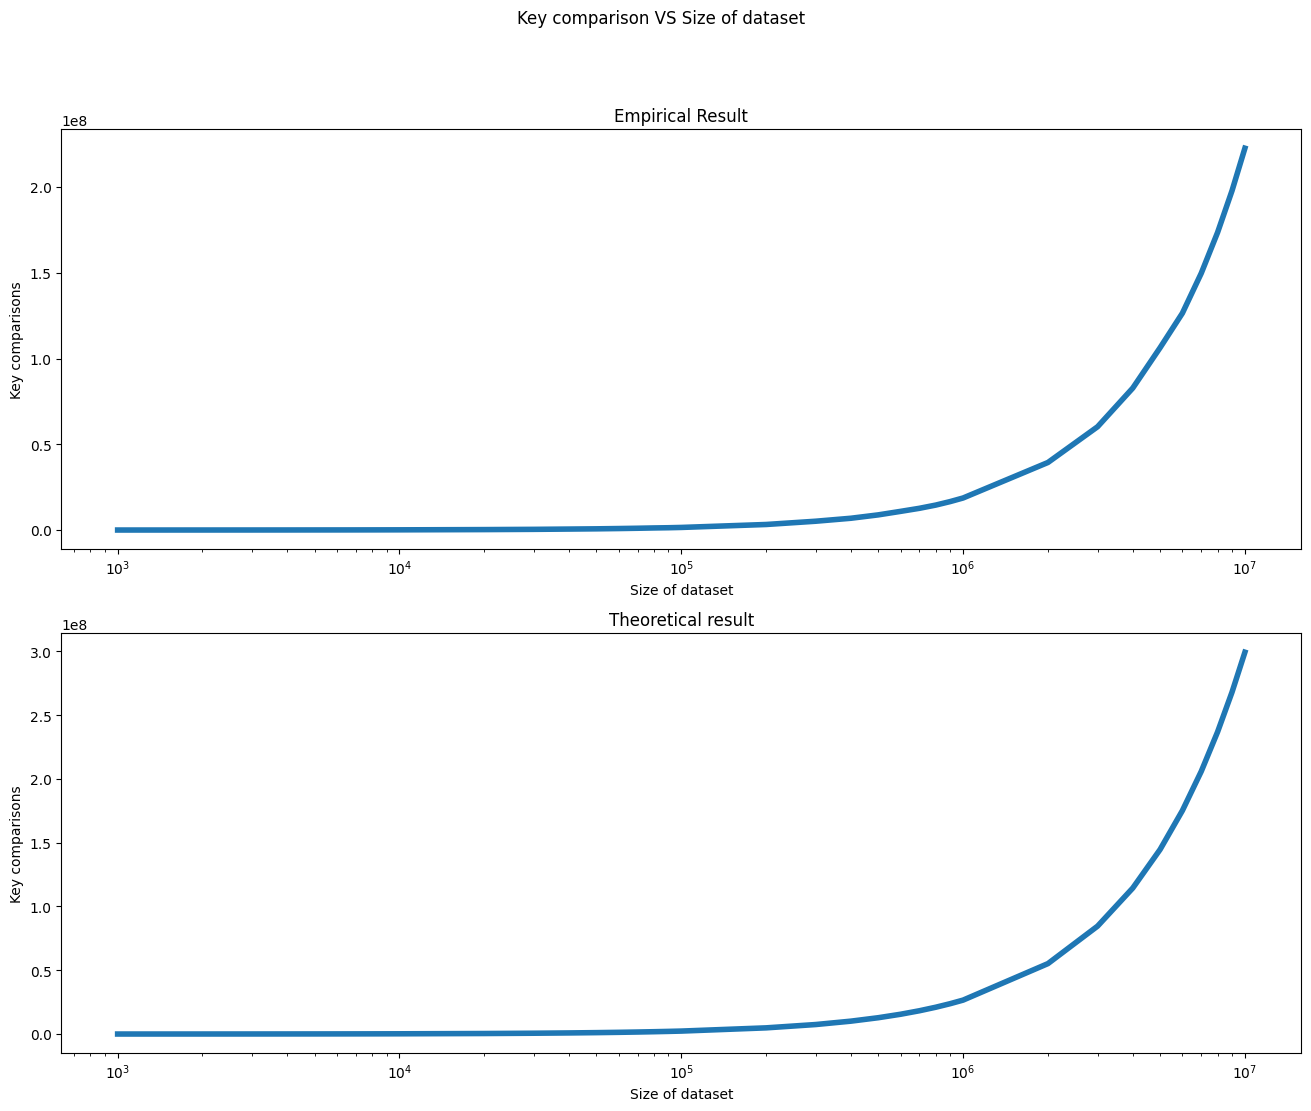

In [15]:
plt.figure(figsize=(16, 12))

# Empirical results form running the algorithm
plt.subplot(2, 1, 1)
plt.plot(sizes,comparisons,linewidth=4)
plt.title ("Empirical Result")
plt.xlabel("Size of dataset")
plt.ylabel("Key comparisons")
plt.xscale('log') 
plt.xticks([1000,10000,100000,1000000,10000000])

# Theoretical results from the formula derived
plt.subplot(2, 1, 2)
x = np.array(sizes)
y = x *10 + x * (np.log2(x/10))
plt.plot(x,y,linewidth=4 )
plt.title('Theoretical result')
plt.xlabel('Size of dataset')
plt.ylabel('Key comparisons')
plt.xscale('log')
plt.xticks([1000,10000,100000,1000000,10000000])

plt.suptitle("Key comparison VS Size of dataset")
plt.show

As we can see here, the theoretical analysis and the empirical results are similar

#### (ii) Plotting key comparisons over different values of threshold S with a fixed dataset N

#### **Theoretical Analysis**

The number of key comparisons, when varying the threshold $S$ on a fixed dataset of $N$ values, will yield a staircase-like pattern.

To explain this phenomenon:

1. Let $N$ be the size of the array and $S = \frac{N}{K}$, where $K$ is the number of sub-arrays.
2. Insertion Sort will only be used when the size of a sub-array is less than or equal to $S$.

If $S$ increases such that $\frac{2N}{K} < S < \frac{N}{K}$:
- Merge Sort will handle sub-arrays of size $\frac{2N}{K}$.
- Insertion Sort will be used for sub-arrays of size $\frac{N}{K}$.

If $S$ is exactly $\frac{2N}{K}$, Insertion Sort will be used on sub-arrays of size $\frac{2N}{K}$. This creates the staircase pattern because $S$ is between two sizes at different levels of the binary tree. The jump in the pattern occurs when $S$ reaches specific sizes such as $\frac{N}{K}$ or $\frac{2N}{K}$.


#### **Empirical Results**

In [16]:
sizes = 10000
print("Using Dataset of Size: ",sizes)

optimalSComparison = Comparisons()

sValues = []
timeTaken = []
keyComparisons = []

#Changing Values of S from 0 to 200 in increments of 5
for S in range(0,201,5):
    optimalSArr = np.random.randint(10000,size = sizes)
    optimalSComparison.reset()
    start = timeit.default_timer()
    hybridSort(optimalSArr, optimalSComparison, S) 
    stop = timeit.default_timer()
    sValues.append(S)
    timeTaken.append(stop-start)
    keyComparisons.append(optimalSComparison.get_count())

data = {
    "sValues":sValues,
    "timeTaken":timeTaken,
    "keyComparisons":keyComparisons
}

df = pd.DataFrame(data)
print(df)


Using Dataset of Size:  10000
    sValues  timeTaken  keyComparisons
0         0   0.018063          116658
1         5   0.017001          117714
2        10   0.017730          123245
3        15   0.017800          123132
4        20   0.020185          138745
5        25   0.020395          139478
6        30   0.020692          139868
7        35   0.020447          139896
8        40   0.027507          180887
9        45   0.027543          180159
10       50   0.027260          179163
11       55   0.027251          179501
12       60   0.027399          180001
13       65   0.027511          180782
14       70   0.027365          179903
15       75   0.027248          179241
16       80   0.042014          266043
17       85   0.042404          268209
18       90   0.042217          267305
19       95   0.042532          268764
20      100   0.042003          266142
21      105   0.042668          270408
22      110   0.042049          266855
23      115   0.042815          26

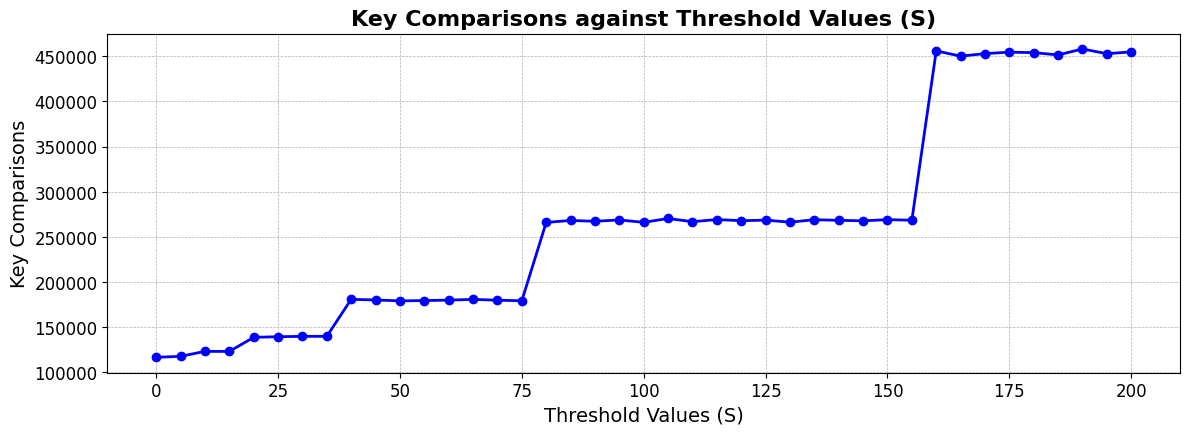

In [17]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(211)
ax.plot(sValues, data["keyComparisons"], color='b', linewidth=2, marker='o')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel("Threshold Values (S)", fontsize=14)
ax.set_ylabel("Key Comparisons", fontsize=14)
ax.set_title("Key Comparisons against Threshold Values (S)", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

<h3>(iii) Using different sizes of input datasets, study how to determine an
optimal value of S for the best performance of this hybrid algorithm.<h3>

S Value:  6
S Value:  13
Optimal S is: 13


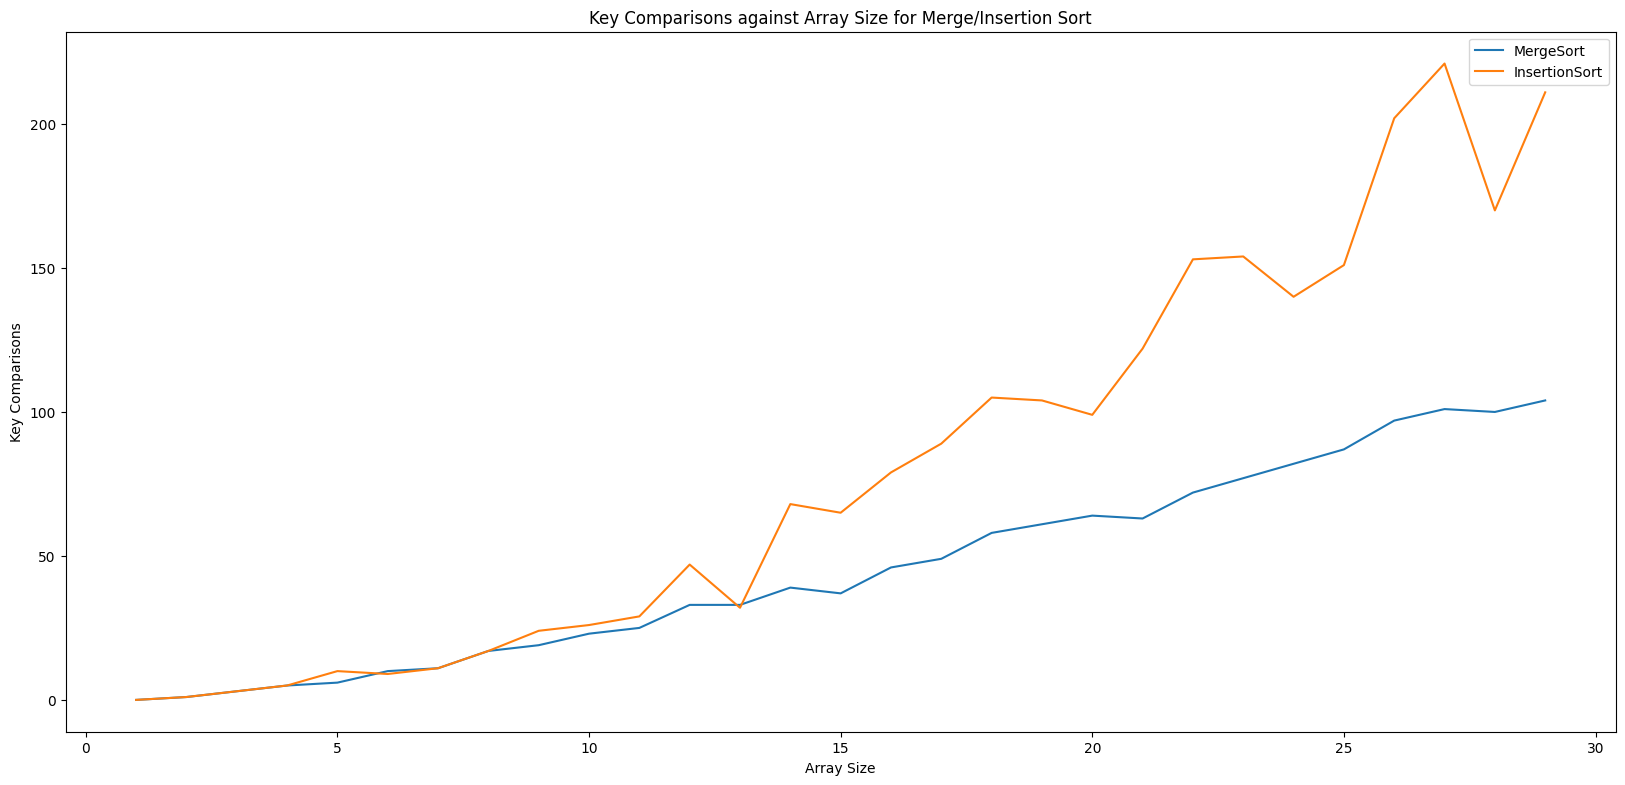

In [26]:
# Variables needed to calculate optimal S
S_optimal = 0
sizes = range(1,30)
KC_merge = []
KC_insert = []
comparison_merge = 0
comparison_insert = 0

# Tracking KC objects
track_merge = Comparisons()
track_insert = Comparisons()

np.random.seed(10)

# Iterating through different sizes of input dataset of up to size 20

for S in sizes:
    # Generate random array
    arr = np.random.randint(10000,size = S)

    arr2 = arr.copy()

    ## MergeSort
    arr = mergeSort(arr, track_merge, 1)
    comparison_merge = track_merge.get_count()
    track_merge.reset()
    
    ## InsertionSort
    arr2 = insertion_sort(arr2, track_insert)
    comparison_insert = track_insert.get_count()
    track_insert.reset()
    
    # Optimal S val is determined where KC for insertion sort is less than KC for merge sort
    # At this threshold, using insertionsort is more effective than using mergesort
    if comparison_insert < comparison_merge:
        print("S Value: ", S);
        S_optimal = S
    
    # Adding KC for each sorting algorithms to respective arrays for graphing purposes
    KC_merge.append(comparison_merge)
    KC_insert.append(comparison_insert)
    
# Graph
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
# Actual Plots
ax.plot(sizes,KC_merge, label="MergeSort") 
ax.plot(sizes, KC_insert, label = "InsertionSort")
# Graph Labels
ax.set_xlabel("Array Size")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size for Merge/Insertion Sort")
ax.legend()

# Print out the Optimal S value.
print('Optimal S is:', S_optimal)

## (d) Compare with original Mergesort

#### Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers

In [22]:
# Initial Initialisation
currArr = copy.deepcopy(datasets[36])
comparisons = Comparisons()

# Determine Merge Sort Time taken & Key Comparisons
mergeSortStart = timeit.default_timer()
mergeSort(currArr, comparisons, 1)   
mergeSortEnd = timeit.default_timer()

mergeSortTimeTaken = mergeSortEnd - mergeSortStart
print("Merge Sort Time Taken: {0:.2f} seconds".format(mergeSortTimeTaken))
print("Number of Key Comparisons for Merge Sort: {}".format(comparisons.get_count()))

# Reinitialise Arrays and Objects
currArr = copy.deepcopy(datasets[36])
comparisons.reset()

# Determine the Same for Hybrid Sort
hybridSortStart = timeit.default_timer()
hybridSort(currArr, comparisons, 16)
hybridSortEnd = timeit.default_timer()

hybridSortTimeTaken = hybridSortEnd - hybridSortStart
print("Hybrid Sort Time Taken: {0:.2f} seconds".format(hybridSortTimeTaken))
print("Number of Key Comparisons for Hybrid Sort: {}".format(comparisons.get_count()))

Merge Sort Time Taken: 31.82 seconds
Number of Key Comparisons for Merge Sort: 216322454


KeyboardInterrupt: 

From here, we can see that the Hybrid Sort is more efficient as it takes a shorter time to finish running.